In [15]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
#Load the training data
train_data = pd.read_csv('mnist_train.csv')
X_train = train_data.drop('label', axis = 1).values
Y_train = train_data['label'].values

In [17]:
#Load the testing data
test_data = pd.read_csv('mnist_test.csv')
X_test = test_data.drop('label', axis = 1).values
Y_test = test_data['label'].values

In [19]:
#Reshape the data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [20]:
#Normalize the pixel values to be between 0 and 1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [26]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [27]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation = "softmax"))

In [28]:
sgd = SGD(0.01)
epochs = 11
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 [==============================] - 8s 13ms/step - loss: 2.2852 - accuracy: 0.1639 - val_loss: 2.2491 - val_accuracy: 0.2738
Epoch 2/11
469/469 [==============================] - 6s 12ms/step - loss: 2.2230 - accuracy: 0.3481 - val_loss: 2.1904 - val_accuracy: 0.4774
Epoch 3/11
469/469 [==============================] - 6s 13ms/step - loss: 2.1559 - accuracy: 0.4805 - val_loss: 2.1097 - val_accuracy: 0.5646
Epoch 4/11
469/469 [==============================] - 5s 10ms/step - loss: 2.0600 - accuracy: 0.5563 - val_loss: 1.9939 - val_accuracy: 0.5538
Epoch 5/11
469/469 [==============================] - 5s 10ms/step - loss: 1.9242 - accuracy: 0.5919 - val_loss: 1.8339 - val_accuracy: 0.6243
Epoch 6/11
469/469 [==============================] - 6s 12ms/step - loss: 1.7493 - accuracy: 0.6281 - val_loss: 1.6432 - val_accuracy: 0.6616
Epoch 7/11
469/469 [==============================] - 5s 11ms/step - loss: 1.5575 - accuracy: 0.6617 - val_loss: 1.4516 - val_accuracy: 0.6856

In [29]:
predictions = model.predict(X_test, batch_size = 128)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       980
           1       0.81      0.99      0.89      1135
           2       0.84      0.73      0.78      1032
           3       0.68      0.84      0.75      1010
           4       0.71      0.80      0.75       982
           5       0.80      0.49      0.61       892
           6       0.84      0.89      0.87       958
           7       0.80      0.87      0.83      1028
           8       0.80      0.63      0.71       974
           9       0.70      0.57      0.63      1009

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



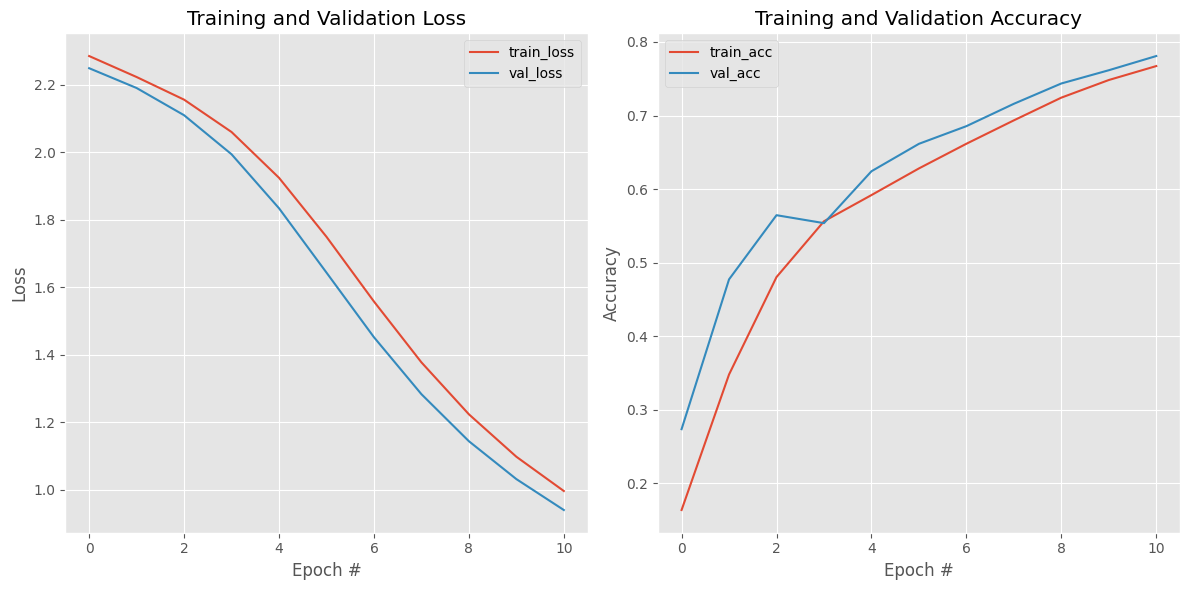

In [30]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()